<a href="https://colab.research.google.com/github/domsoos/machine_learning/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Load in the data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),#drop out probability of 20%
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.9133 - val_loss: 0.1380 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1413 - accuracy: 0.9577 - val_loss: 0.0991 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.0893 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9736 - val_loss: 0.0798 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - accuracy: 0.9760 - val_loss: 0.0792 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9790 - val_loss: 0.0696 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9818 - val_loss: 0.0710 - val_accuracy:

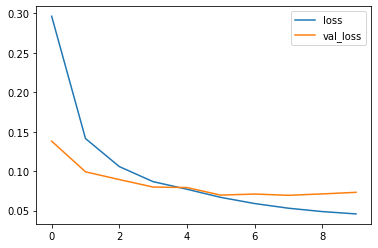

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

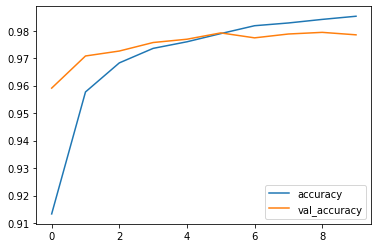

In [ ]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9785
[0.07313632220029831, 0.9785000085830688]


Confusion matrix, without normalization
[[ 971    0    3    1    1    1    2    1    0    0]
 [   0 1127    4    0    0    1    1    0    2    0]
 [   4    1 1012    0    3    0    2    5    4    1]
 [   1    0    6  988    0    4    0    5    4    2]
 [   1    0    6    0  956    0    2    1    2   14]
 [   2    0    0   11    1  869    2    1    4    2]
 [   6    3    1    1    6    6  931    0    4    0]
 [   2    5    7    1    0    0    0 1008    0    5]
 [   4    1    1    8    3    7    0    4  942    4]
 [   3    2    0    7    6    2    0    5    3  981]]


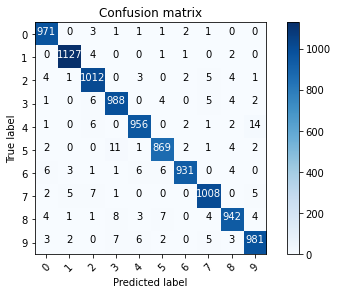

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

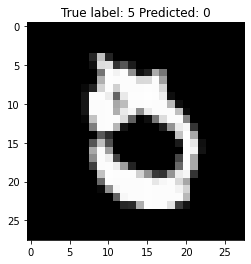

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));